<a href="https://colab.research.google.com/github/Adityachauhan2344/Adityachauhan2344/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
!pip install pandas-profiling
#import pandas_profiling as pp
import ydata_profiling

import warnings
import itertools
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')

warnings.filterwarnings('ignore')

In [5]:
import os

# Replace 'new_directory' with the desired name of the new directory
new_directory = "../input/eeg-brainwave-dataset-feeling-emotions/"

# Create the new directory in the current working directory (usually '/content/')
os.makedirs(new_directory, exist_ok=True)

In [6]:
import shutil

# Replace 'features_raw.csv' with the file name and path of the file you want to move
file_to_move = '/content/emotions.csv (1).zip'

# Replace '../input/eeg-dataset/' with the destination directory path
destination_directory = '../input/eeg-brainwave-dataset-feeling-emotions/'

# Move the file to the destination directory
shutil.move(file_to_move, destination_directory)

'../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv (1).zip'

In [7]:
df = pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv (1).zip')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [8]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

In [29]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [27]:
X_train.shape

(1044, 2548)

In [28]:
Y_train.shape

(1044, 3)

GNB classifier

In [24]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


DNN classifier


In [10]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X = StandardScaler().fit_transform(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [11]:
i_dnn = Input(shape=(2548, ))

x_dnn = Dense(2548, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(5096, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.3)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(2548, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

y_dnn = Dense(3, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)

dnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense (Dense)               (None, 2548)              6494852   
                                                                 
 batch_normalization (BatchN  (None, 2548)             10192     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2548)              0         
                                                                 
 dense_1 (Dense)             (None, 3822)              9742278   
                                                                 
 batch_normalization_1 (Batc  (None, 3822)             15288     
 hNormalization)                                             

In [12]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_dnn_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

dnn_model.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

dnn_h = dnn_model.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=5,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 1.8391 - accuracy: 0.8180
Epoch 1: val_accuracy improved from -inf to 0.66741, saving model to ./best_dnn_model.h5
33/33 [==============================] - 56s 2s/step - loss: 1.8391 - accuracy: 0.8180 - val_loss: 61.6608 - val_accuracy: 0.6674 - lr: 0.0010
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 0.3855 - accuracy: 0.9004
Epoch 2: val_accuracy did not improve from 0.66741
33/33 [==============================] - 45s 1s/step - loss: 0.3855 - accuracy: 0.9004 - val_loss: 59.0140 - val_accuracy: 0.5692 - lr: 9.0484e-04
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.9004
Epoch 3: val_accuracy did not improve from 0.66741
33/33 [==============================] - 47s 1s/step - loss: 0.3138 - accuracy: 0.9004 - val_loss: 7.5463 - val_accuracy: 0.5938 - lr: 8.1873e-04
Epoch 4/5
33/33 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9349
E

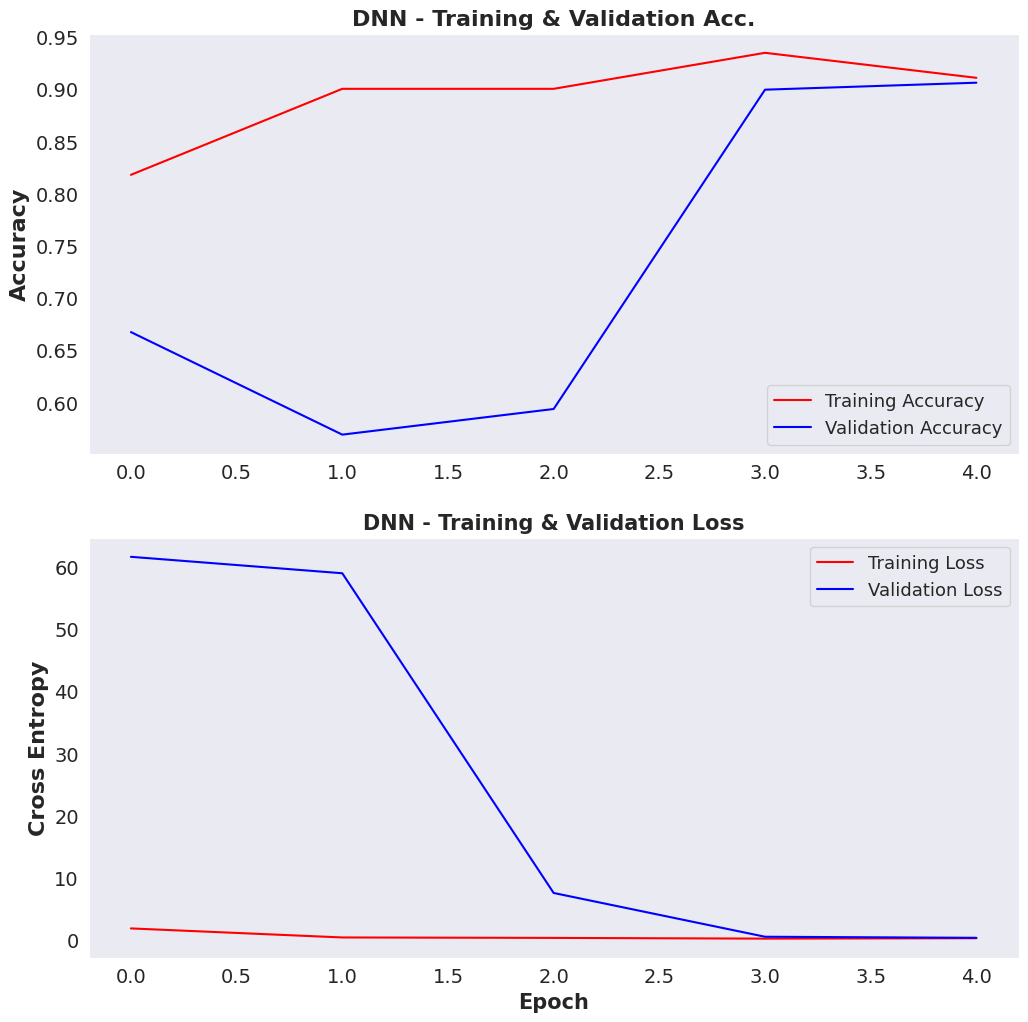

In [13]:
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']

loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [14]:
dnn_best = load_model('./best_dnn_model.h5')
dnn_acc = dnn_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. DNN: {:.3f}%".format(dnn_acc * 100))

Test Acc. DNN: 91.562%


In [23]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Fit the label encoder on y_test to obtain the classes

# Transform both y_test and y_pred to numeric format using the same classes
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print(classification_report(y_test_encoded, y_pred_encoded))

ValueError: ignored

GRU Classifier

In [31]:
i_gru = Input(shape=(X_train.shape[1], 1))

x_gru = GRU(256, return_sequences=True)(i_gru)
x_gru = Flatten()(x_gru)
y_gru = Dense(3, activation='softmax')(x_gru)

model_gru = Model(i_gru, y_gru)

model_gru.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense_6 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________


In [32]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_gru_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_gru.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

gru_h = model_gru.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=5,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.8448
Epoch 1: val_accuracy improved from -inf to 0.87723, saving model to ./best_gru_model.h5
33/33 [==============================] - 241s 7s/step - loss: 0.6741 - accuracy: 0.8448 - val_loss: 0.3160 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 0.2122 - accuracy: 0.9243
Epoch 2: val_accuracy improved from 0.87723 to 0.89509, saving model to ./best_gru_model.h5
33/33 [==============================] - 232s 7s/step - loss: 0.2122 - accuracy: 0.9243 - val_loss: 0.3527 - val_accuracy: 0.8951 - lr: 9.0484e-04
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.1308 - accuracy: 0.9540
Epoch 3: val_accuracy improved from 0.89509 to 0.92634, saving model to ./best_gru_model.h5
33/33 [==============================] - 245s 7s/step - loss: 0.1308 - accuracy: 0.9540 - val_loss: 0.2050 - val_accuracy: 0.9263 - lr: 8.1873e-04
Epoch 4/5
3

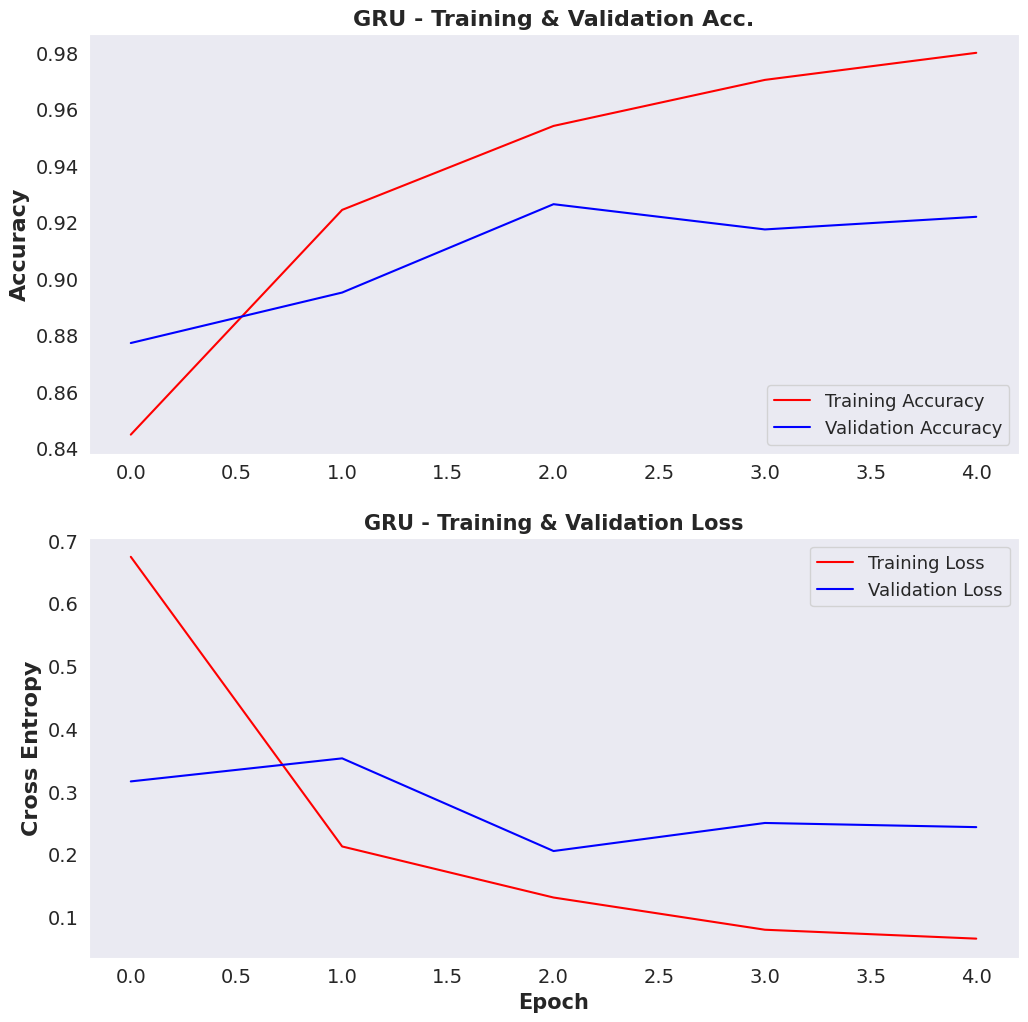

In [33]:
acc = gru_h.history['accuracy']
val_acc = gru_h.history['val_accuracy']

loss = gru_h.history['loss']
val_loss = gru_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [34]:
gru_best = load_model('./best_gru_model.h5')
gru_acc = gru_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. GRU: {:.3f}%".format(gru_acc * 100))

Test Acc. GRU: 92.188%
